#### CS166 Pre-class Work for Session 10.1:

### The Monte Carlo Method

_Yoav Rabinovich, March 2019_

-------

#### Shonkwiler Exercise 8: Random Walk with Drift
_Use a biased coin to simulate a random
walk of 30 steps on the line. If the coin falls heads (H), take one step to
the right, if it lands tails (T ), take one step left. After 30 steps, note the
final position. Take Pr(H)=0.6 and Pr(T )=0.4._

_(a) Plot a sample path._

_(b) Make a histogram for 200 such random walks._

_(c) Report the sample mean._

_(d) Report the sample variance. (What should these be exactly?)_

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [0]:
# Setting right as positive
def random_walk(n_steps,P_h):
    pos = [0]
    for step in range(n_steps-1):
        if np.random.random() < P_h:
            pos.append(pos[-1]+1)
        else:
            pos.append(pos[-1]-1)
    return pos

n_steps = 30
P_h = 0.6
n_walks = 200

sample_walk = random_walk(n_steps,P_h)
mega_walk = []
for walk in range(n_walks):
    mega_walk.append(random_walk(n_steps,P_h)[-1])

mean_exp = (0.6-0.4)*30
mean_smp = np.mean(mega_walk)
var_exp = np.average(np.square(mega_walk))-np.square(mean_exp)
var_smp = np.var(mega_walk)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


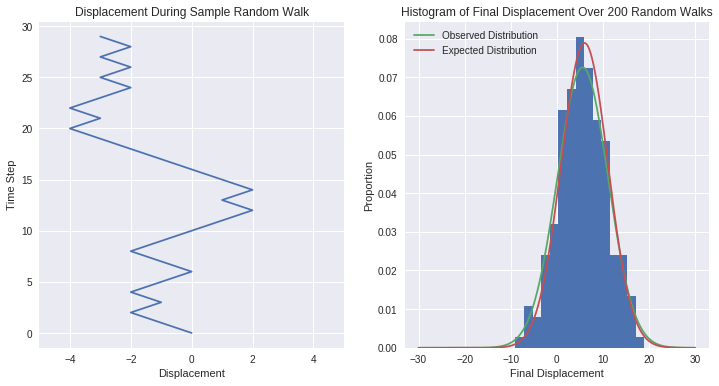

-----
Expected Mean:     5.999999999999998
Sample Mean:       5.6
-----
Expected Variance: 25.600000000000023
Sample Variance:   30.24


In [0]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Displacement During Sample Random Walk")
plt.xlabel("Displacement")
plt.ylabel("Time Step")
plt.plot(sample_walk,range(n_steps))
plt.xlim(-5,5)

plt.subplot(1,2,2)
plt.title("Histogram of Final Displacement Over 200 Random Walks")
plt.xlabel("Final Displacement")
plt.ylabel("Proportion")
plt.hist(mega_walk,bins=15,normed=True)
gaussian_x = np.linspace(-30,30,1000)
gaussian_y = np.multiply(norm.pdf(gaussian_x, mean_smp, np.sqrt(var_smp)),1)
expected_y = np.multiply(norm.pdf(gaussian_x, mean_exp, np.sqrt(var_exp)),1)
plt.plot(gaussian_x, gaussian_y, label="Observed Distribution")
plt.plot(gaussian_x,expected_y, label="Expected Distribution")
plt.legend()

plt.show()

print("-----")
print("Expected Mean:     " + str(mean_exp))
print("Sample Mean:       " + str(mean_smp))
print("-----")
print("Expected Variance: " + str(var_exp))
print("Sample Variance:   " + str(var_smp))

#### Shonkwiler Exercise 9: Gambler's Ruin with Time Limits

_Modify the simulation code in Section 1.1.3 starting on page 8 for the gambler’s ruin problem, but with
various upper bounds on the iteration count. How does this bias the average duration of the game? How does this bias the sample variance?_

In [0]:
initial_fortune = 100
bank = 2000
iterations = np.logspace(1,4,10)

means = []
variances = []
for i in iterations:
    results=[]
    for trial in range(np.int(i)):
        steps_survived=0
        fortune=initial_fortune
        while 0<fortune<(initial_fortune+bank):
            if np.random.random() < 0.5:
                fortune+=1
            else:
                fortune-=1
            steps_survived+=1
        results.append(steps_survived)
    means.append(np.mean(results))
    variances.append(np.var(results))

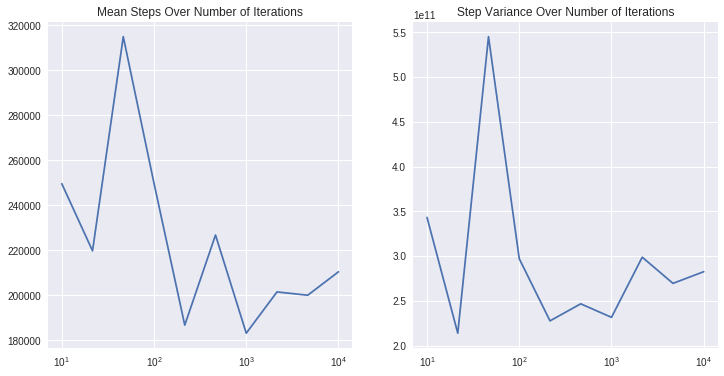

In [0]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Mean Steps Over Number of Iterations")
plt.semilogx(iterations,means)
plt.subplot(1,2,2)
plt.title("Step Variance Over Number of Iterations")
plt.semilogx(iterations,variances)
plt.show()